In [2]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pathlib

In [8]:
data_dir = pathlib.Path("../../datasets/teste1/")

In [9]:
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

30


In [11]:
A = list(data_dir.glob('A/*'))
B = list(data_dir.glob('B/*'))

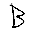

In [21]:
PIL.Image.open(str(A[0]))
PIL.Image.open(str(B[4]))

In [67]:
batch_size = 10 #total 2
img_height = 32
img_width = 32

In [68]:
#Create training dataset

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.34,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 30 files belonging to 2 classes.
Using 20 files for training.


In [69]:
#Create test dataset

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.34,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 30 files belonging to 2 classes.
Using 10 files for validation.


In [70]:
#2 classes no total

class_names = train_ds.class_names
print(class_names)

['A', 'B']


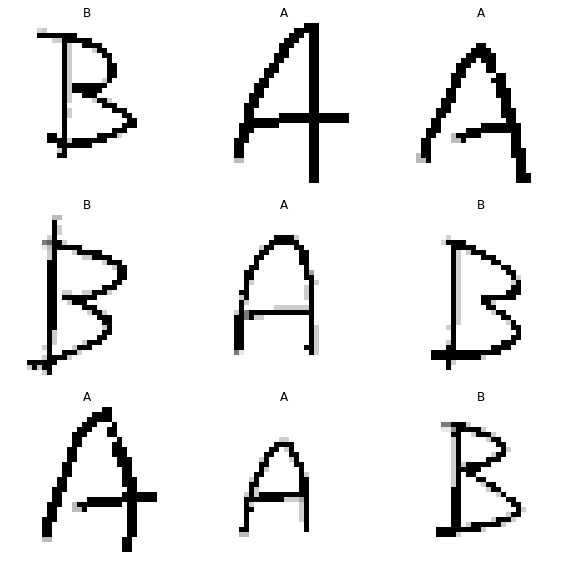

In [154]:
#Visualize data

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [153]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(10, 32, 32, 3)
(10,)


In [172]:
#Test on default model

classes = 2

model = tf.keras.Sequential()

model.add(tf.keras.layers.Rescaling(1./255))
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(256, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(1024, activation='sigmoid'))
model.add(tf.keras.layers.Dense(classes, activation='softmax'))

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [173]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5
2/2 [==============================] - 1s 144ms/step - loss: 2.1149 - accuracy: 0.5500 - val_loss: 0.8496 - val_accuracy: 0.4000
Epoch 2/5
2/2 [==============================] - 0s 38ms/step - loss: 0.4648 - accuracy: 0.8000 - val_loss: 1.0924 - val_accuracy: 0.4000
Epoch 3/5
2/2 [==============================] - 0s 39ms/step - loss: 0.0401 - accuracy: 1.0000 - val_loss: 1.6597 - val_accuracy: 0.4000
Epoch 4/5
2/2 [==============================] - 0s 43ms/step - loss: 0.0546 - accuracy: 1.0000 - val_loss: 1.9414 - val_accuracy: 0.4000
Epoch 5/5
2/2 [==============================] - 0s 40ms/step - loss: 6.2214e-04 - accuracy: 1.0000 - val_loss: 2.1557 - val_accuracy: 0.4000


In [174]:
model.evaluate(val_ds)

1/1 [==============================] - 0s 17ms/step - loss: 2.1557 - accuracy: 0.4000


[2.155702829360962, 0.4000000059604645]

In [169]:
#test with simpler model

num_classes = 2

model2 = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])
model2.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [170]:
model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5
)

Epoch 1/5
2/2 [==============================] - 0s 111ms/step - loss: 0.6952 - accuracy: 0.5500 - val_loss: 0.7149 - val_accuracy: 0.4000
Epoch 2/5
2/2 [==============================] - 0s 15ms/step - loss: 0.6566 - accuracy: 0.5500 - val_loss: 0.6872 - val_accuracy: 0.4000
Epoch 3/5
2/2 [==============================] - 0s 13ms/step - loss: 0.6287 - accuracy: 0.5500 - val_loss: 0.6594 - val_accuracy: 0.4000
Epoch 4/5
2/2 [==============================] - 0s 13ms/step - loss: 0.5904 - accuracy: 0.6000 - val_loss: 0.6311 - val_accuracy: 0.6000
Epoch 5/5
2/2 [==============================] - 0s 16ms/step - loss: 0.5440 - accuracy: 0.9500 - val_loss: 0.5881 - val_accuracy: 0.9000


In [171]:
model2.evaluate(val_ds)

1/1 [==============================] - 0s 10ms/step - loss: 0.5881 - accuracy: 0.9000


[0.5881203413009644, 0.8999999761581421]

In [168]:
# There are some ways to improve the NN performance by making some changes to the dataset
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

